# Bulanıklaştırma

Görüntü bulanıklığı, görüntünün düşük geçişli bir filtre uygulanmasıyla elde edilir.
Gürültüyü gidermek için kullanışlıdır. Aslında görüntüden yüksek frekanslı içeriği (örneğin: parazit, kenarlar) kaldırır.
OpenCV, üç ana tür bulanıklaştırma tekniği sağlar.

Ortalama Bulanıklaştırma
    Bir görüntünün normalleştirilmiş bir kutu filtresiyle sarılmasıyla yapılır.
    Çekirdek alanı altındaki tüm piksellerin ortalamasın alır ve bu ortalamayı merkezi öğe ile yer değiştirir.
    
Gauss Bulanıklaştırma
    Bu yöntemde kutu filtresi yerine Gauss çekirdeği kullanılır.
    Pozitif ve tek olması gereken çekirdeğin genişliğini ve yüksekliğini belirtilir.
    SigmaX ve sigmaY, X ve Y yönlerindeki standart sapmayı belirtmeliyiz.
    
Medyan Bulanıklaştırma
    Çekirdek alanı altındaki tüm piksellerin medyanını alır ve merkezi öğe bu medyan değerle değiştirilir.


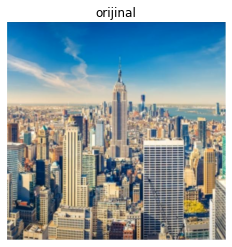

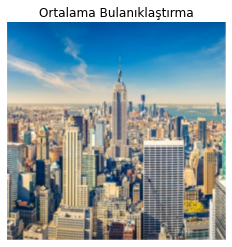

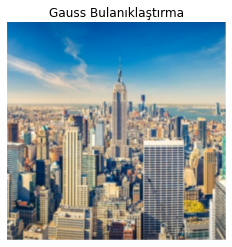

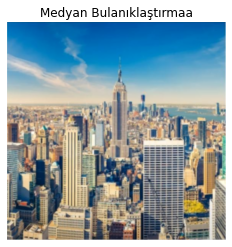

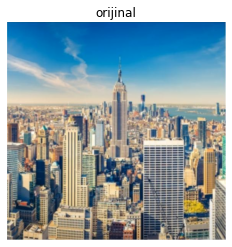

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


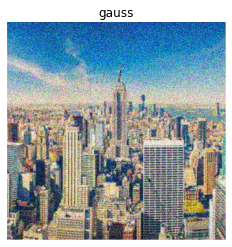

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


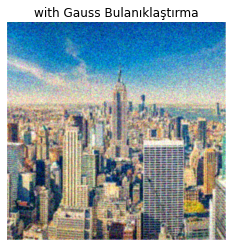

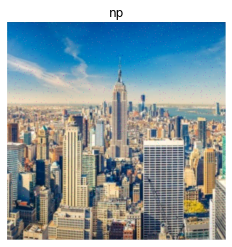

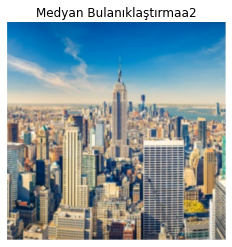

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 575.5, 573.5, -0.5),
 Text(0.5, 1.0, 'Medyan Bulanıklaştırmaa2'),
 None)

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# warnings bir uyarı kütüphanesidir
import warnings 
warnings.filterwarnings("ignore")#ignorehatalarını ortadan kaldır

#bluring (detayı azaltır ve gürültüyü engeller)
img=cv2.imread("img/manzara5.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(),plt.imshow(img),plt.axis("off"),plt.title("orijinal"),plt.show()


#Ortalama Bulanıklaştırma
dst2=cv2.blur(img,ksize=(3,3))
plt.figure(),plt.imshow(dst2),plt.axis("off"),plt.title("Ortalama Bulanıklaştırma"),plt.show()


#Gauss Bulanıklaştırma
gb=cv2.GaussianBlur(img,ksize=(3,3),sigmaX=7)
plt.figure(),plt.imshow(gb),plt.axis("off"),plt.title("Gauss Bulanıklaştırma"),plt.show()

#Medyan Bulanıklaştırma
mb=cv2.medianBlur(img,ksize=3)
plt.figure(),plt.imshow(mb),plt.axis("off"),plt.title("Medyan Bulanıklaştırmaa"),plt.show()



#resimlerimizin üzerine noise koyacağız bu bize ... sağlayacak

def gaussianNoise(image):
    #resmin boyutlaarını ve renk kanalının değişkenlere atıyorum
    row, col, ch = image.shape
    
    #ort değerimiz 0
    mean=0
    
    #ort değer
    var=0.05
    
    #standart sapma
    sigma=var**0.5
    
    #random bir tuval oluşturuyorum bu gürültü oluyor daha sonra bu gürültüyle resmimi topluyorum 
    gauss=np.random.normal(mean,sigma,(row,col,ch))
    gauss=gauss.reshape(row,col,ch)
    noisy=image+gauss
    
    return noisy

#görüntüyü içeri alıp değerleri normalize edicez yani pikseller 0 ile 1 arasında değerler alıcak
img=cv2.imread("img/manzara5.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)/255
plt.figure(),plt.imshow(img),plt.axis("off"),plt.title("orijinal"),plt.show()   


gaussianNoiseImage=gaussianNoise(img)
plt.figure(),plt.imshow(gaussianNoiseImage),plt.axis("off"),plt.title("gauss"),plt.show()     
    
    
#Gauss Bulanıklaştırma
gb2=cv2.GaussianBlur(gaussianNoiseImage,ksize=(3,3),sigmaX=7)
plt.figure(),plt.imshow(gb2),plt.axis("off"),plt.title("with Gauss Bulanıklaştırma"),plt.show()

#resmin üzerine tuz ve karabiber serpilmiş gibi yap
def saltPepperNoise(image):
    #resmin boyutlaarını ve renk kanalının değişkenlere atıyorum
    row, col, ch = image.shape
    
    #tuz ve biber oranı
    s_vs_p=0.5
    amount=0.004
    
    #standart sapma
    noisy=np.copy(image)
    
    #tuz yani beyaz noktacıkları ekliyorum
    num_salt=int(np.ceil(amount*image.size*s_vs_p))
    
    #beyaz gürültünün kordinatlarını belirliyorum
    coords=[np.random.randint(0, i-1, num_salt) for i in image.shape]
    noisy[coords] = 1
    
    #karabiber yani siyah noktacıkları ekliyorum
    num_pepper=int(np.ceil(amount*image.size*(1 - s_vs_p)))
    
    #siyah gürültünün kordinatlarını belirliyorum
    coords=[np.random.randint(0, i-1, num_pepper) for i in image.shape]
    noisy[coords] = 0
 
    return noisy


npNoiseImage=saltPepperNoise(img)
plt.figure(),plt.imshow(npNoiseImage),plt.axis("off"),plt.title("np"),plt.show()     
    
#Medyan Bulanıklaştırma
mb2=cv2.medianBlur(npNoiseImage.astype(np.float32),ksize=3)
plt.figure(),plt.imshow(mb2),plt.axis("off"),plt.title("Medyan Bulanıklaştırmaa2"),plt.show()
